In [1]:
import cv2
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Morphological Operations
These are operations that are used to analyze the geometric structures in binary and gray scale images. There are various morphological operations mentioned below
### 1. Erosion
Erosion is used to reduce the size of the object. It works by removing pixels around the bounadries of the objects.\
**Purpose -** Remove noises that are hanging around the object and touching the object. But this will also lead to loose the thickness of the object.\
**Procedure -**
1. A kernel of size n x n is assigned and slided over the image.
2. If all the pixels in the kernel is greater than 1 then the output center pixel is 1. Else 0.
3. Multiple Iterations can be ran to further erode the image.
### 2. Dilation
Dilation is used to increase the size of the object. It works by adding more pixels around the boundary.\
**Purpose -** Fill spaces in between objects with a disadvantage of adding an extra layer to thickness to the object.\
**Procedure -**
1. A kernal of size n x n is assigned and slided over the image.
2. If atlease one of the pixel has value more than 1 then the output will be 1 else 0.

(150, 112)
(150, 112)


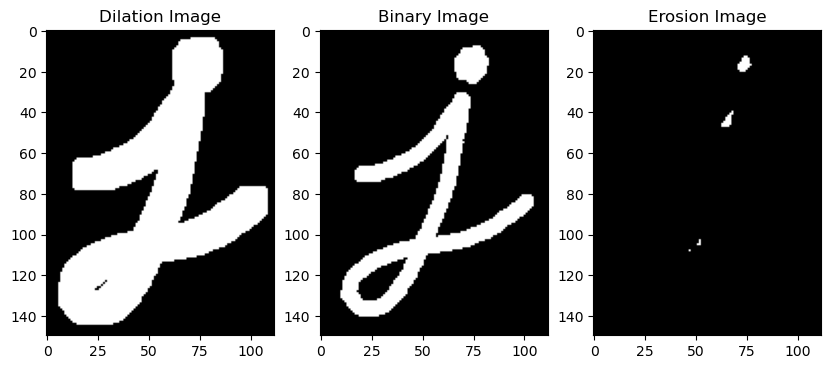

In [25]:
gray_img = cv2.imread("images/morphological_image.png", cv2.IMREAD_GRAYSCALE)
ret, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
print(gray_img.shape)
print(binary_img.shape)

# Define Kernel with value 1
kernel = np.ones((3,3),np.uint8)
erosion_img = cv2.erode(binary_img, kernel, iterations=4)
dilation_img = cv2.dilate(binary_img, kernel, iterations=4)

plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(dilation_img, cmap="gray")
plt.title("Dilation Image")
plt.subplot(1,3,2)
plt.imshow(binary_img, cmap="gray")
plt.title("Binary Image")
plt.subplot(1,3,3)
plt.imshow(erosion_img, cmap="gray")
plt.title("Erosion Image")
plt.show()

### 3. Opening
This is a method to remove the hanging noise or random noise. The advantage of this method is that it will remove the hanging noise without loosing the thickness of the object.\
**Procedure -**
1. Define a kernel.
2. Perform Erosion - This will remove the random noise but will also reduce the thickness of the object.
3. Perform Dilation - This step will increase the thickness that was lost in the previous step.

Text(0.5, 1.0, 'Opening Image')

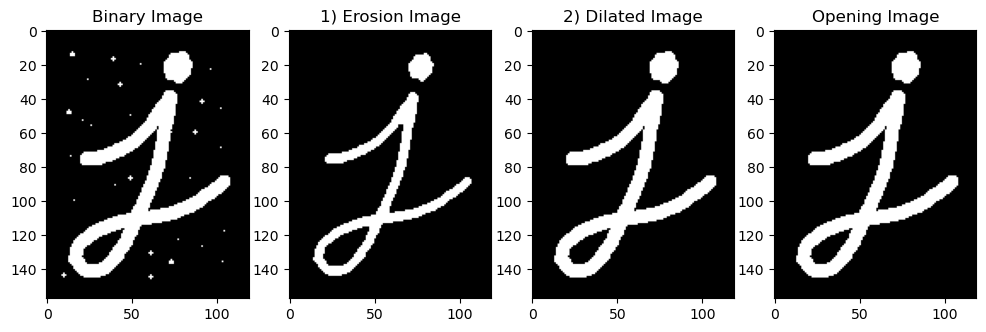

In [35]:
gray_img = cv2.imread("images/opening_image.png", cv2.IMREAD_GRAYSCALE)
ret, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

erosion_img = cv2.erode(binary_img, kernel, iterations = 1)
dilation_img = cv2.dilate(erosion_img, kernel, iterations = 1)

plt.figure(figsize=(12,10))
plt.subplot(1,4,1)
plt.imshow(binary_img, cmap="gray")
plt.title("Binary Image")
plt.subplot(1,4,2)
plt.imshow(erosion_img, cmap="gray")
plt.title("1) Erosion Image")
plt.subplot(1,4,3)
plt.imshow(dilation_img, cmap="gray")
plt.title("2) Dilated Image")

# We can also do it in a single step
opening_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
plt.subplot(1,4,4)
plt.imshow(opening_img, cmap="gray")
plt.title("Opening Image")

### 4. Closing
This is a method used to fill in the gaps in the object. The advantage of this method is it will fill gaps without adding extra layer of thickness to the object\
**Procedure -**
1. Define a kernel.
2. Perform Dilation - This will fill in the gaps but will add an extra layer of thickness.
3. Perform Dilation - This step will decrease the layer that was added in the previous step.

Text(0.5, 1.0, 'Closing Image')

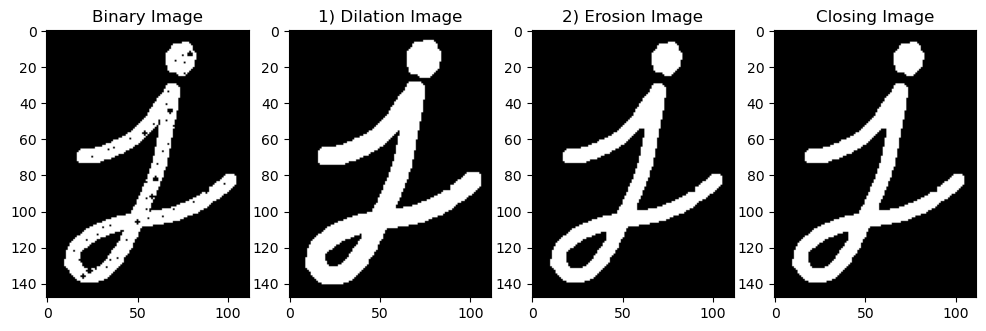

In [37]:
gray_img = cv2.imread("images/closing_image.png", cv2.IMREAD_GRAYSCALE)
ret, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

dilation_img = cv2.dilate(binary_img, kernel, iterations = 1)
erosion_img = cv2.erode(dilation_img, kernel, iterations = 1)


plt.figure(figsize=(12,10))
plt.subplot(1,4,1)
plt.imshow(binary_img, cmap="gray")
plt.title("Binary Image")
plt.subplot(1,4,2)
plt.imshow(dilation_img, cmap="gray")
plt.title("1) Dilation Image")
plt.subplot(1,4,3)
plt.imshow(erosion_img, cmap="gray")
plt.title("2) Erosion Image")

# We can also do it in a single step
closing_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)
plt.subplot(1,4,4)
plt.imshow(closing_img, cmap="gray")
plt.title("Closing Image")

Yet to Do
1. Black Hat
2. White Hat
3. Morphological Gradient